In [174]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import framework.em_code as em_code
import emm_question as emm
import blr_question as blr
importlib.reload(em_code)
importlib.reload(emm)
importlib.reload(blr)

<module 'blr_question' from 'C:\\Users\\campb\\Documents\\Comp4670\\Assignment-1\\assignment_1\\packaged\\blr_question.py'>

## EMM Visualization

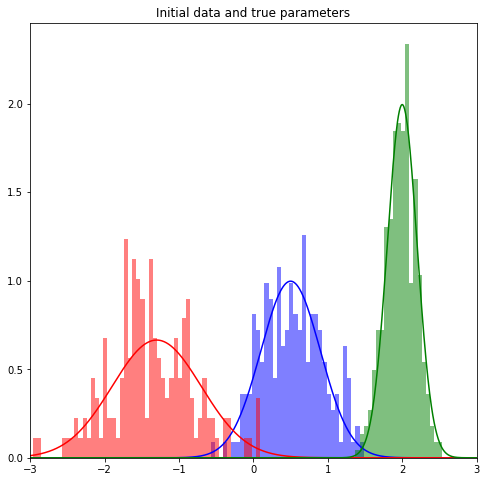

In [175]:
importlib.reload(emm) # reloads changes made to emm_question.py
pi_gt, mu_gt, std_gt, gaussian_1, gaussian_2, gaussian_3, data, Ns = em_code.make_GMM_data()
em_code.plot_GMM_data(gaussian_1, gaussian_2, gaussian_3)
plt.title("Initial data and true parameters") # Notice that params are in std
em_code.plot_GMM_components(mu_gt, std_gt, ['b','r','g'], Ns, 0.2)
plt.show()

In [176]:
N = len(data)
K = 3
pi = np.ones((K,1))/K # (K,1)
mu = np.array([[-2],[0],[2]]) # (K,1)
var = np.stack([[0.5], [0.5], [0.5]], axis=0) # (K,1); Notice this is in var
eta = np.stack([em_code.gmm_to_eta(mu[i], var[i]) for i in range(K)])

(3, 2) 3
(3, 2) 3
(3, 2) 3
(3, 2) 3
(3, 2) 3


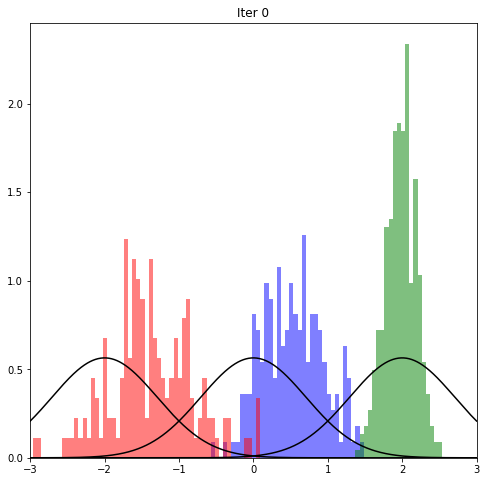

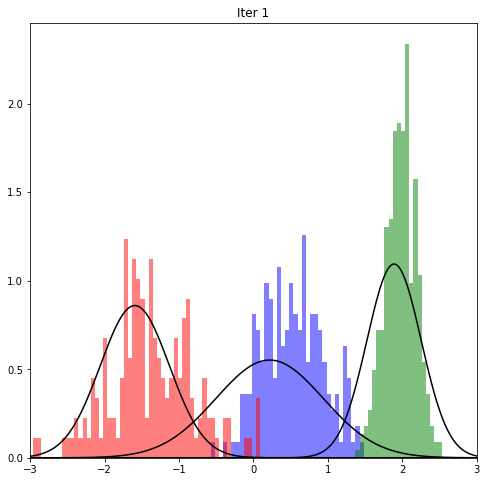

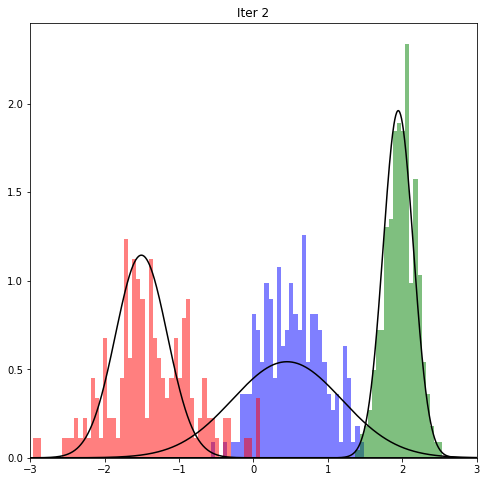

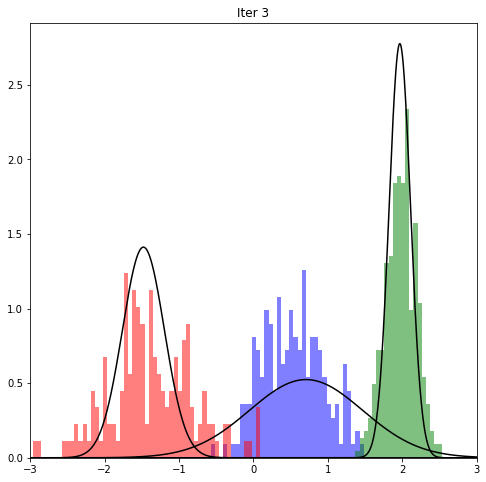

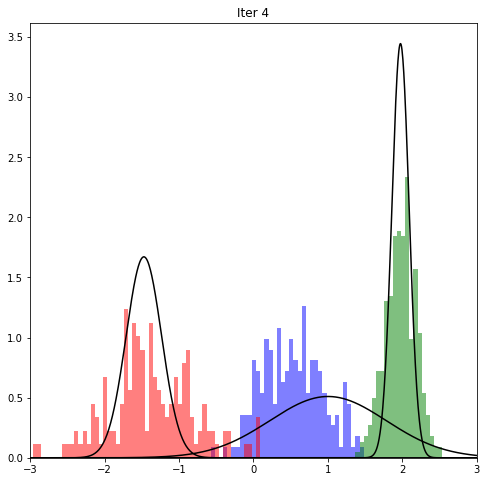

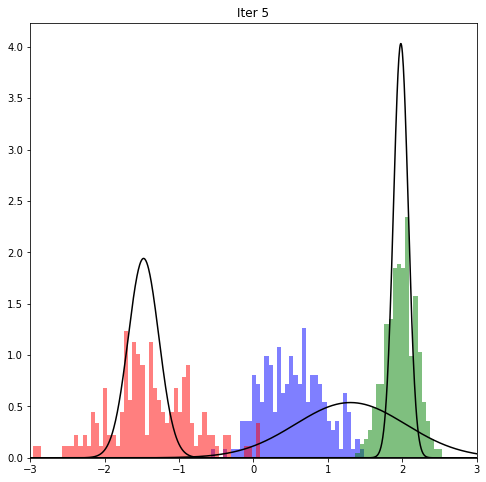

In [177]:
i = 0
pi_i = pi
eta_i = eta

# Init Values
theta_i = np.stack([em_code.gmm_from_eta(eta_i[i]) for i in range(K)], axis=1)
mu_i, var_i = theta_i[0], theta_i[1]
std_i = np.sqrt(var_i) # Notice we have to convert to std

# Init Plot
em_code.plot_GMM_data(gaussian_1, gaussian_2, gaussian_3)
plt.title("Iter {}".format(i))
em_code.plot_GMM_components(mu_i, std_i, ['k','k','k'], 0.2)

for j in range(5):
    i = j + 1
    # Updates
    gamma_i = emm.e_step_EMM(data, pi_i, eta_i, em_code.gmm_sufstat, N, K)
    pi_i, eta_i = emm.m_step_EMM(data, gamma_i, em_code.gmm_sufstat, em_code.gmm_exp_to_nat, N, K)
    
    # Parameters
    theta_i = np.stack([em_code.gmm_from_eta(eta_i[i]) for i in range(K)], axis=1)
    mu_i, var_i = theta_i[0].reshape(K, -1), theta_i[1].reshape(K, -1)
    std_i = np.sqrt(var_i)
    
    # Plotting
    if i in [1,2,3,4,5]:
        em_code.plot_GMM_data(gaussian_1, gaussian_2, gaussian_3)
        plt.title("Iter {}".format(i))
        em_code.plot_GMM_components(mu_i, std_i, ['k','k','k'], 0.2)

## BLR Visualizer

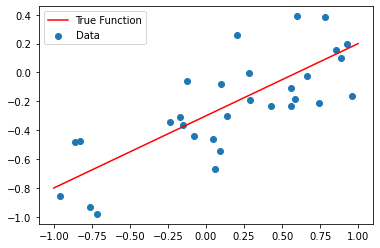

In [7]:
## Supporting Cell Do NOT change
importlib.reload(blr) # reloads changes made to blr_question.py
line_x, line_y, data_x, data_y, true_w = em_code.make_blr_data()
features = em_code.make_phi(data_x) # (n,d)
targets = data_y.reshape(-1,1) # (n,1)
fig, ax = plt.subplots()
em_code.plot_blr_function(ax, line_x, line_y, data_x, data_y)
plt.show()

In [ ]:
## Supporting Cell Do NOT change
# Clearly not a reasonable choice for alpha and beta,
# but we will use this to showcase how the EM algorithm
# will overcome this bad initial prediction
initial_alpha = 100 
initial_beta = 0.001

em_code.run_simple_blr_model(
    blr.single_EM_iter_blr, initial_alpha, initial_beta, line_x, line_y,
    data_x, data_y, features, targets, true_w)